# Lab 1 : Syntagmatic Word Association Minining

Two words wa and wb have a syntagmatic relation if they can be combined with each other in a grammatical sentence—meaning that these two words are semantically related. For example, cat and sit are related because a cat can sit somewhere (usually anywhere they please). Similarly, car and drive are related semantically because they can be combined with each other to convey some meaning.

There are many applications where syntagmatic relation mining is important. For example, in retrieval, words that have strong syntagmatic relations with the original query words can be used to expand the query in order to enhance retrieval results. For example, if the current word is drive, we can use syntagmatic word association to suggest car as the next word. Another application is opinion summarization; for example, we can extract the top K syntagmatically related words to “iPhone 6” from a corpus of customer reviews in order to summarize the users' feedback.

This lab has been divided into two parts : 
1. In the first part, we look at two different ways of extracting most related words in a corpus, the first one is co-occurrence count between words and the other is mutual information. For every word in the document, you will define a fixed no. of words to the left and right as its context. So, for every occurence of a given word, you will get a different context resulting in a list of contexts. You will find 2 text files containing 20 words each in the extracted folder. We will do a co-occurrence and mutual information analysis of the 40 words and see which way is better for getting meaningful co-related word pairs. 


2. In the second part, we will use pointwise mutual information to mine most related words for a given word. This is what we call query expansion

## Important Instructions - 

1. You are not allowed to use any in-built libraries for calculating co-occurrence counts or pointwise mutual information. 
2. Please make changes only inside the graded function. Do not make changes anywhere else in the notebook.
3. Please read the description of every graded function very carefully. Description clearly states what is the expectation of each graded function. 
4. After almost every graded function, there is a cell which you can run and see if the expected output matches the output you are getting. 
5. The expected output provided is just a way for you to access the correctness of your code. The code will be tested on other cases also.

## Grading Policy - 

1. You will receive full credit if the code passes all test cases.
2. In case of error, partial credit will be awarded based on your code and no. of test cases passed .

In [1]:
#importing libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string 
import nltk
import math
import numpy as np
import re
from nltk.stem import WordNetLemmatizer 

In [2]:
#reading 5k reviews from yelp_reviews5k.txt file
with open("yelp_reviews5k.txt",'r') as fileObject :
    yelp_data=fileObject.read()

## Graded Fucntion 1 : get_vocab_words (2 marks)

Pupose : To get list of words in the corpus using nltk's word_tokenize method after converting corpus to lower case. 

In [3]:
#graded function 1
def get_vocab_words(data) :
    '''data - string input
    Output - output a list of words after tokenzing string document
    '''
    #converting to lower case
    data=data.lower()
    #removing words containing punctuation or digits
    data=re.sub(r"[^a-z]", " ", data)
    #start code here
    list_words=nltk.word_tokenize(data)
    
    return list_words
    ##end code

In [4]:
example='''We ordered the fried green tomato appetizer, and it was truly ordinary.  The tomatoes were breaded too heavily, and there wasn't anything particularly flavorful on the plate.  For dinner, we ordered the flatiron steak, the half chicken, green beans, and cauliflower.  The meats were just dreadful.  The steak was undercooked, and it was served cold.  The chicken was warm when it was brought to the table, but it was so bland that it was not worth eating.  Candidly, a rotisserie chicken from the Fresh Market is much, much better than the chicken they served us here.  The vegetables weren't memorable in any way.  The beans were luke warm and a bit oily.  The cauliflower's sauce\/flavoring was simply not enough to make it enjoyable.  We skipped dessert, for there seemed to be no point in prolonging the evening.  '''
example_words=get_vocab_words(example)
print(len(example_words))
print("." in example_words)
print("," in example_words)

141
False
False


## Expected Output - 

len(example_words) = 141

"." in example_words = False

"," in example_words = False

In [5]:
yelp_words=get_vocab_words(yelp_data)

## Graded Function 2 : get_word_mappings (3 marks)

Purpose : 
1. To generate a list of all unique words in the document using the list of words obtained above. 
2. To generate dictionaries to map words to index and vice versa

For example - let list of all words : ['and' , 'and', 'i', 'the']

unique_words = ['and','i','the']

word_index = {'and':0 ,'i':1 ,'the':2}

In [6]:
from collections import OrderedDict
def get_word_mappings(vocab_words) :
    '''vocab_words - list of all words in the document
    Output - list of all unique words, dictionary to map every unique word to index, dictionary to map index to word.
    '''
    #start code here
#     unique_list=list(set(vocab_words))
    unique_list=list(OrderedDict.fromkeys(vocab_words))
    word_index={k: v for v, k in enumerate(unique_list)}
    index_word=dict((y,x) for x,y in word_index.items())
    
    
    #end code here
    return unique_list,word_index,index_word


In [7]:
unique_words,word_index,index_word=get_word_mappings(yelp_words)
# print(index_word)
print(len(unique_words))
print(word_index['cream'])
print(index_word[13332])

20963
707
watership


## Expected Output - 

len(unique_words) = 20963

word_index['cream'] = 707

index_word[13332] = 'watership'

## Graded Function 3 :  get_all_window_words (10 marks)
 
Purpose : To traverse the document(list of all words) once and for each word, record every word to the left and right in the given window range(context as defined in the introduction). So, the output will be a dictionary which will have each unique word as key and value as list of lists where each sublist is a different context of the word.
We will use window size = 3

For Example : let l = ['the','chicken','appetizer','was','good','chicken','was','properly','cooked'] be the list of all words and window size=2

window_words = 

{'the' :   [['chicken','appetizer']].....

 'chicken'  :    [['the','appetizer','was']   ,   ['was','good','was','properly']].......}

In [35]:
from collections import OrderedDict
def get_all_window_words(document,window=3) :
    '''
    Input - document(list of all words) and window size
    Output - dictionary in which key is word and value is list of lists where each sublist corresponds to a different
    of the word.
    '''
    #start code here
#     print(document)
    u_list=list(OrderedDict.fromkeys(document))
    final_dict={}
    for x in u_list: 
        final_list=[]
        for y,z in enumerate(document):
            if(x==z):
                if(y-window<0):
                    dd=document[0:y]
                else:
                    dd=document[y-window:y]
                if(len(document)-y<window):
                    ee=document[y+1:len(example)]
                else:
                    ee=document[y+1:y+(window+1)]
                jj=dd[:]+ee[:]
                final_list.append(jj)
        final_dict[x]=final_list
        
    
    #end code here
    return final_dict

In [37]:
# example=['the','chicken','appetizer','was','good','chicken','was','properly','cooked']
# # for y,z in enumerate(example):
# #     print(y,z)
# window=3
# x=7
# if(x-3<0):
#     dd=example[0:x]
# else:
#     dd=example[x-3:x]
# if(len(example)-x<window):
#     ee=example[x+1:len(example)]
# else:
#     ee=example[x+1:x+4]
# jj=dd[:]+ee[:]
# print(dd)
# print(ee)
# print(jj)
# print(len(yelp_words))

# example=['the','chicken','appetizer','was','good','chicken','was','properly','cooked']
yelp_all_window_wordsss=get_all_window_words(yelp_words[:1000],3)
# yelp_all_window_wordsss=get_all_window_words(example,3)
# print("yelp words",yelp_words[:20])
print()
# print(yelp_all_window_wordsss)

In [38]:
# example=['the','chicken','appetizer','was','good','chicken','was','properly','cooked']
# yelp_all_window_words=get_all_window_words(example,3)
# print(yelp_all_window_words)

yelp_all_window_words=get_all_window_words(yelp_words,3)
example=['the','chicken','appetizer','was','good','chicken','was','properly','cooked']

print(get_all_window_words(example))
print(get_all_window_words(example)['chicken'])
print(len(yelp_all_window_words['chicken']))
print(len(yelp_all_window_words['soup']))

{'the': [['chicken', 'appetizer', 'was']], 'chicken': [['the', 'appetizer', 'was', 'good'], ['appetizer', 'was', 'good', 'was', 'properly', 'cooked']], 'appetizer': [['the', 'chicken', 'was', 'good', 'chicken']], 'was': [['the', 'chicken', 'appetizer', 'good', 'chicken', 'was'], ['was', 'good', 'chicken', 'properly', 'cooked']], 'good': [['chicken', 'appetizer', 'was', 'chicken', 'was', 'properly']], 'properly': [['good', 'chicken', 'was', 'cooked']], 'cooked': [['chicken', 'was', 'properly']]}
[['the', 'appetizer', 'was', 'good'], ['appetizer', 'was', 'good', 'was', 'properly', 'cooked']]
676
221


## Expected Output - 

get_all_window_words(example)['chicken'] = [['the', 'appetizer', 'was', 'good'], ['appetizer', 'was', 'good', 'was', 'properly', 'cooked']]

len(yelp_all_window_words['chicken']) = 676

len(yelp_all_window_words['soup']) = 221

## Graded Function 4 : get_cooccurrence_count (10 marks)

Purpose : Given two words wa and wb, find the no. of times wb occurs in the context of wa. 

You should use the window_words generated previously to find co-occurrence.

For Example : let l = ['the','chicken','appetizer','was','good','chicken','was','properly','cooked'] be the list of all words and window size=2

Hence, dictionary of window_words :

{'the': [['chicken', 'appetizer', 'was']], 'chicken': [['the', 'appetizer', 'was', 'good'], ['appetizer', 'was', 'good', 'was', 'properly', 'cooked']], 'appetizer': [['the', 'chicken', 'was', 'good', 'chicken']], 'was': [['the', 'chicken', 'appetizer', 'good', 'chicken', 'was'], ['was', 'good', 'chicken', 'properly', 'cooked']], 'good': [['chicken', 'appetizer', 'was', 'chicken', 'was', 'properly']], 'properly': [['good', 'chicken', 'was', 'cooked']], 'cooked': [['chicken', 'was', 'properly']]}

In this case, co-occurence of chicken and appetizer is 2. 

Important Note - Each word is to be counted only once per context. So, even if chicken appears twice in the 1st context of appetizer, co-occurence count between appetizer and chicken will be 1.

In [41]:
def get_cooccurrence_count(wa,wb) :
    '''
    Input - two words wa and wb whose co-occurrence count is to be calculated
    Output - the co-occurence count
    '''
    #start code here
    ll=yelp_all_window_words[wa]
#     print(ll)
    count=0
    for x in ll:
           if(wb in x):
                count+=1
    #end code here
    return count

In [43]:
# "print(get_cooccurrence_count("appetizer","chicken"))
# print((yelp_all_window_words['to']))
print(get_cooccurrence_count("the","and"))
print(get_cooccurrence_count("if","the"))
print(get_cooccurrence_count("to","the"))

5515
290
3161


## Expected Output - 

get_cooccurrence_count("the","and") = 5515

get_cooccurrence_count("if","the") = 290

get_cooccurrence_count("to","the") = 3161

## We will now load the 20 word-pairs present in cooccurrence_words.txt and mi_words.txt to compare approaches of co-occurrence count and mutual information.

In [44]:
with open("cooccurrence_words.txt",'r') as fileObject :
    word_list1=fileObject.read().split("\n")

In [45]:
with open("mi_words.txt",'r') as fileObject :
    word_list2=fileObject.read().split("\n")

## Graded Function 5 : coOccurrence_analysis (10 marks)

Purpose : This function will iterate through the list of words pairs and calculate the co-occuerence of each word pair. You should calculate the co-occurence count of the 2nd word in the pair given the contexts of 1st word.

You should finally return a dictionary with the word-pair as the key and co-occurence count as the value. The dictionary should be arranged in descending order by count

In [60]:
def coOccurrence_analysis(word_list) :
    '''
    Input - list of word pairs separated by '-'
    Output - dictionary of word pairs and counts in descending order
    '''
    #start code here
    f_dict={}
    for x in word_list:
        parts=x.split("-");
#         print(parts[0])
        ll=yelp_all_window_words[parts[0]]
        count=0
        for l in ll:
               if(parts[1] in l):
                    count+=1
        f_dict[x]=count
    f_dict={k: v for k, v in sorted(f_dict.items(), key=lambda item: item[1],reverse=True)}
    return f_dict
    #end code here

In [61]:
coOccurrence_analysis(word_list1)

{'the-and': 5515,
 'was-the': 3733,
 'i-the': 3590,
 'of-the': 3286,
 'to-the': 3161,
 'is-the': 2804,
 'a-to': 1805,
 'for-the': 1789,
 'it-the': 1442,
 'my-and': 1318,
 'the-food': 1288,
 'this-place': 1260,
 'was-a': 1208,
 'we-the': 1130,
 'but-the': 1081,
 'is-a': 1079,
 'at-the': 1032,
 'in-a': 1029,
 'are-the': 989,
 'were-the': 975}

## Expected Output - 

{'the-and': 5515,

 'was-the': 3733,
 
 'i-the': 3590,
 
 'of-the': 3286,
 
 'to-the': 3161,
 
 'is-the': 2804,
 
 'a-to': 1805,
 
 'for-the': 1789,
 
 'it-the': 1442,
 
 'my-and': 1318,
 
 'the-food': 1288,
 
 'this-place': 1260,
 
 'was-a': 1208,
 
 'we-the': 1130,
 
 'but-the': 1081,
 
 'is-a': 1079,
 
 'at-the': 1032,
 
 'in-a': 1029,
 
 'are-the': 989,
 
 'were-the': 975}

In [62]:
coOccurrence_analysis(word_list2)

{'ice-cream': 136,
 'grocery-store': 30,
 'gluten-free': 23,
 'dim-sum': 22,
 'feels-like': 21,
 'grilled-chicken': 18,
 'figure-out': 16,
 'all-kinds': 16,
 'every-penny': 11,
 'pointed-out': 10,
 'other-reviewers': 10,
 'smoked-salmon': 9,
 'tucked-away': 8,
 'bone-marrow': 8,
 'no-whatsoever': 7,
 'san-francisco': 6,
 'hooked-up': 5,
 'cheeseburger-fries': 5,
 'hollandaise-sauce': 5}

## Expected Output - 

{'ice-cream': 136,

 'grocery-store': 30,
 
 'gluten-free': 23,
 
 'dim-sum': 22,
 
 'feels-like': 21,
 
 'grilled-chicken': 18,
 
 'figure-out': 16,
 
 'all-kinds': 16,
 
 'every-penny': 11,
 
 'pointed-out': 10,
 
 'other-reviewers': 10,
 
 'smoked-salmon': 9,
 
 'tucked-away': 8,
 
 'bone-marrow': 8,
 
 'no-whatsoever': 7,
 
 'san-francisco': 6,
 
 'hooked-up': 5,
 
 'cheeseburger-fries': 5,
 
 'hollandaise-sauce': 5}


## We can observe that the co-occurence counts of words in co-occuerence_words.txt is much more than of the words present in mi_words.txt

## Graded Function 6 : get_mutual_information (15 marks)

Purpose : To calculate pointwise mutual information between two words w1 and w2 given their context windows.

Pointwise mutual information between two words w1 and w2 is defined as - 

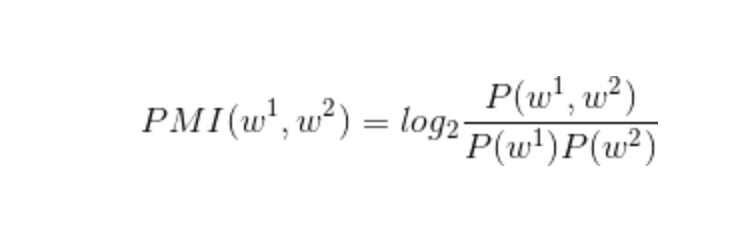

Here the numerator is the joint probability(P(w1,w2)) of w1 and w2 occurring together and the denominator is the product of probabilities of getting w1(Pw1) and w2(Pw2) separately.

Pw1 and Pw2 can be calculated easily since we know the no. of context windows of w1 and w2 both and also the total no. of words.

P(w1,w2) can be written as the product of P(w2|w1) and Pw1.

P(w2|w1) is the conditional probaility of getting w2 given w1. This conditional probability depends on the times w2 

appears in the context of w1. 

Note - If you get P(w2|w1)=0, please set this probability to 10**(-8) to avoid math domain error

In [161]:
from collections import Counter
import math
def get_mutual_information(w1,w2) :
    '''
    Input - two words w1 and w2 for which mutual information is to be calculated.
    Output - mutual information value
    '''
    #start code here
#     ll=yelp_all_window_words[w2]
#     print("www",len(ll))
    counts = Counter(yelp_words)
    
    p_w1=counts[w1]/len(yelp_words)
    p_w2=counts[w2]/len(yelp_words)
#     print(counts[w1],counts[w2])
    p_w2_w1=get_cooccurrence_count(w1,w2)/counts[w1]
    if (p_w2_w1 == 0 ):
        p_w2_w1=10**(-8)
#     print(p_w1,p_w2,p_w2_w1)
    #end code here
    return math.log2((p_w2_w1*p_w1)/(p_w1*p_w2))

In [162]:
print(get_mutual_information('san','francisco'))
print(get_mutual_information('gluten','free'))
print(get_mutual_information('chicken','soup'))
print(get_mutual_information('ice','cream'))
print(get_mutual_information('grilled','chicken'))
print(get_mutual_information('smoked','salmon'))
print(get_mutual_information('cheeseburger','fries'))

13.982097212415777
10.3569283892996
5.507560734408284
10.487418072007339
7.138958808119725
10.363187379771283
9.108565213753689


## Expected Output - 

get_mutual_information('san','francisco') = 13.982097212415777

get_mutual_information('gluten','free') = 10.3569283892996

get_mutual_information('chicken','soup') = 5.507560734408283

get_mutual_information('ice','cream') = 10.487418072007339

get_mutual_information('grilled','chicken') = 7.138958808119725

get_mutual_information('smoked','salmon') = 10.363187379771285

get_mutual_information('cheeseburger','fries') = 9.10856521375369

## Graded Function 7 : mutualInformation_analysis (5 marks)

Purpose : To calculate mutual information for a list of word pairs using the function created above.

In [163]:
def mutualInformation_analysis(word_list) :
    '''
    Input - list of word pairs separated by '-'
    Output - dictionary of word pairs and mutual information in descending order
    '''
    #start code here
    f_dict={}
    for x in word_list:
        parts=x.split("-");
        mf=get_mutual_information(parts[0],parts[1]) 
        f_dict[x]=mf
    f_dict={k: v for k, v in sorted(f_dict.items(), key=lambda item: item[1],reverse=True)}
    return f_dict
    #end code here

## We will first find the mutual information for top 20 co-occurring word pairs found above.

In [164]:
d1=mutualInformation_analysis(word_list1)
print(d1)

{'this-place': 6.084338173795711, 'the-food': 3.4054447915690362, 'is-the': 3.0905725298874707, 'of-the': 3.0458438072138545, 'was-the': 2.9488282594872963, 'at-the': 2.9042235477873777, 'are-the': 2.8448795894171717, 'my-and': 2.8414195287425046, 'were-the': 2.7862298477422227, 'in-a': 2.731375779096832, 'is-a': 2.7025955093716245, 'the-and': 2.542651252030105, 'for-the': 2.447412841211646, 'a-to': 2.44146090999395, 'but-the': 2.357360258629396, 'was-a': 2.310927669516065, 'we-the': 2.270052242276006, 'to-the': 2.2600286441171553, 'i-the': 2.1352903913514725, 'it-the': 1.7926707108544109}


## Expected Output - 

{'this-place': 6.084338173795712,

 'the-food': 3.4054447915690362,
 
 'is-the': 3.090572529887471,
 
 'of-the': 3.0458438072138545,
 
 'was-the': 2.9488282594872963,
 
 'at-the': 2.9042235477873777,
 
 'are-the': 2.8448795894171717,
 
 'my-and': 2.8414195287425046,
 
 'were-the': 2.7862298477422227,
 
 'in-a': 2.731375779096832,
 
 'is-a': 2.7025955093716245,
 
 'the-and': 2.542651252030105,
 
 'for-the': 2.4474128412116465,
 
 'a-to': 2.4414609099939506,
 
 'but-the': 2.357360258629396,
 
 'was-a': 2.3109276695160657,
 
 'we-the': 2.270052242276006,
 
 'to-the': 2.2600286441171558,
 
 'i-the': 2.135290391351472,
 
 'it-the': 1.7926707108544109}

## We will now find the mutual information for  20 word pairs mentioned in mi_words.txt.

In [165]:
d2=mutualInformation_analysis(word_list2)
d2

{'san-francisco': 13.982097212415777,
 'bone-marrow': 13.897061108559978,
 'dim-sum': 13.700447128414636,
 'ice-cream': 10.487418072007339,
 'smoked-salmon': 10.363187379771283,
 'gluten-free': 10.3569283892996,
 'grocery-store': 10.190134340775154,
 'tucked-away': 10.130169741089048,
 'every-penny': 9.742675363803933,
 'hollandaise-sauce': 9.665123999471179,
 'cheeseburger-fries': 9.108565213753689,
 'other-reviewers': 8.58625097815677,
 'no-whatsoever': 8.209005114874719,
 'hooked-up': 7.915638936114294,
 'feels-like': 7.595258118267924,
 'all-kinds': 7.5757403363677085,
 'figure-out': 7.563642193849838,
 'pointed-out': 7.529426478511926,
 'grilled-chicken': 7.138958808119725}

## Expected Output - 

{'san-francisco': 13.982097212415777,

 'bone-marrow': 13.897061108559978,
 
 'dim-sum': 13.700447128414638,
 
 'ice-cream': 10.487418072007339,
 
 'smoked-salmon': 10.363187379771285,
 
 'gluten-free': 10.3569283892996,
 
 'grocery-store': 10.190134340775156,
 
 'tucked-away': 10.130169741089048,
 
 'every-penny': 9.742675363803935,
 
 'hollandaise-sauce': 9.665123999471179,
 
 'cheeseburger-fries': 9.10856521375369,
 
 'other-reviewers': 8.586250978156771,
 
 'no-whatsoever': 8.209005114874717,
 
 'hooked-up': 7.915638936114294,
 
 'feels-like': 7.595258118267923,
 
 'all-kinds': 7.5757403363677085,
 
 'figure-out': 7.563642193849839,
 
 'pointed-out': 7.529426478511926,
 
 'grilled-chicken': 7.138958808119725}

## We can observe that top words according to co-occurence analysis are actually very common words and don't help us in obtaining logically related words in a corpus. On the other hand, the words mentioned in the mi_words.txt file are more syntagmatically related as evident by the mutual information analysis

## Graded Function 8 : get_mutualInformation_word_vector (10 marks)

Purpose : To generate a vector(list) of mutual information for the given word. You will calculate mutual information 

between the given word and every unique word that has occured atleast once in given word's list of contexts. All 

other words will have 0 mutal information.

element j of the vector represents the mutual information of word with index j and the current word. 

In [268]:
import itertools

def get_mutualInformation_word_vector(word) :
    '''
    Input - word for which vector is to found.
    Output - list of mutual information values.
    '''
    #start code here
    vector=np.zeros(len(unique_words))
    ll=yelp_all_window_words[word]
    merged =  [j for i in ll for j in i]
#     print(merged)
    unique_ll=list(OrderedDict.fromkeys(merged))
    for x, y in enumerate(unique_words):
        if (y in unique_ll):
            vector[x]=get_mutual_information(word,y)
    return list(vector)
        
    #end code here

In [249]:
# for x, y in enumerate(unique_words):
#     print(x,y)
# mu=get_mutualInformation_word_vector('san')
print(unique_words.index('san'))
print(unique_words.index('francisco'))
print(unique_words.index('mateo'))
print(mu[585])
print(mu[20552])

584
585
20552
13.982097212415777
13.982097212415777


## Graded Function 9 : get_query_word (5 marks)

Purpose : To recommend the most related words to a given word that can be used in query expansion using mutual information. 

You will use the method defined above to get the mutual information of every unique word with the given word and then 

pick words with highest mutual information.

Please note that there can be more than one word with highest value. So, you should include them all.

In [269]:
def get_query_word(word) :
    '''
    Input - query word for which most related words are to be found.
    Output - dictionary with key as word and mutual information as value
    '''
    #start code here
    ddict={}
    vect=get_mutualInformation_word_vector(word)
#     print(vect)
    
    Z = zip(vect,unique_words)
    new_Z=sorted(Z,reverse=True)
#     print(new_Z)
    vect_sorted = [y for y, x in new_Z]
    uniq_sorted = [x for y, x in new_Z]
    v_max=max(vect_sorted)
    v_maxlist=[i for i in vect_sorted if (abs(i - v_max)<10**(-8))]
#     print(v_maxlist)
    for ii,jj in enumerate(v_maxlist):
        ddict[uniq_sorted[ii]]=jj
    #end code here
    
    return ddict

In [270]:
print(get_query_word('san'))
print(get_query_word('gluten'))
print(get_query_word('peacock'))
print(get_query_word('chicken'))
print(get_query_word('marine'))
print(get_query_word('negatively'))
print(get_query_word('nba'))

{'sharetea': 13.982097212415777, 'miyagi': 13.982097212415777, 'mateo': 13.982097212415777, 'marzano': 13.982097212415777, 'jacinto': 13.982097212415777, 'ithaca': 13.982097212415777, 'gioenovese': 13.982097212415777, 'francisco': 13.982097212415777}
{'intolerance': 14.06698611000229, 'inquiries': 14.06698611000229, 'graving': 14.06698611000229}
{'feathers': 19.111380229360744}
{'moo': 10.710500793078559, 'chargrilled': 10.710500793078559, 'abt': 10.710500793078559}
{'corps': 19.111380229360744}
{'impacting': 19.111380229360744}
{'playoff': 19.111380229360744}


## Expected Output - 

print(get_query_word('san')) = {'francisco': 13.982097212415777, 'ithaca': 13.982097212415777, 'miyagi': 13.982097212415777, 'marzano': 13.982097212415777, 'gioenovese': 13.982097212415777, 'jacinto': 13.982097212415777, 'sharetea': 13.982097212415777, 'mateo': 13.982097212415777}

print(get_query_word('gluten')) = {'graving': 14.06698611000229, 'inquiries': 14.06698611000229, 'intolerance': 14.06698611000229}

print(get_query_word('peacock')) = {'feathers': 19.111380229360744}

print(get_query_word('chicken')) = {'moo': 10.710500793078559, 'abt': 10.710500793078559, 'chargrilled': 10.710500793078559}

print(get_query_word('marine')) = {'corps': 19.111380229360744}

print(get_query_word('negatively')) = {'impacting': 19.111380229360744}

print(get_query_word('nba')) = {'playoff': 19.111380229360744}